In [28]:
import numpy as np
import pandas as pd
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier

In [29]:
# MAKE SURE TO CHANGE THIS TO THE LOCAL PATH TO DATA
#TRAIN_PATH = "../augmented_train/reformatted_train_106800_samples.csv"
TRAIN_PATH = "train_15000_samples_0_to_10_hz_consensus_1.0_balanced.csv"

data = pd.read_csv(TRAIN_PATH)

data_np = data.to_numpy()

In [30]:
num_input = data_np.shape[1] - 1

x = data_np[:, 0:num_input]
y = data_np[:, num_input]

# Shuffle the dataset based on sample indices
shuffled_indices = np.random.permutation(x.shape[0])

# Choose the first 80% as training set, next 10% as validation and the rest as testing
train_split_idx = int(0.80 * x.shape[0])
val_split_idx = int(0.90 * x.shape[0])

train_indices = shuffled_indices[0:train_split_idx]
val_indices = shuffled_indices[train_split_idx:val_split_idx]
test_indices = shuffled_indices[val_split_idx:]

# Select the examples from x and y to construct our training, validation, testing sets
x_train, y_train = x[train_indices, :], y[train_indices]
x_val, y_val = x[val_indices, :], y[val_indices]
x_test, y_test = x[test_indices, :], y[test_indices]

In [31]:
num_neighbors = [1, 2, 3, 4, 5]
models = []
val_scores = []

for neighbors in num_neighbors:
    model = KNeighborsClassifier(n_neighbors=neighbors, weights='distance', p=1)

    model.fit(x_train, y_train)

    predictions_train = model.predict(x_train)
    score_train = model.score(x_train, y_train)

    predictions_val = model.predict(x_val)
    score_val = model.score(x_val, y_val)

    models.append(model)
    val_scores.append(score_val)

    print('{} Neighbors - Training accuracy: {:0.5f}%  Validation accuracy: {:0.2f}%'.format(neighbors, score_train*100, score_val*100))

best_idx = np.argmax(val_scores)
best_model = models[best_idx]

print(f"The best model is {num_neighbors[best_idx]} Neighbors")

# Best solver on the test set
predictions_test = best_model.predict(x_test)
score_test = best_model.score(x_test, y_test)

print("The test results.... {:0.2f}%".format(score_test*100))

1 Neighbors - Training accuracy: 100.00000%  Validation accuracy: 84.24%
2 Neighbors - Training accuracy: 100.00000%  Validation accuracy: 84.24%
3 Neighbors - Training accuracy: 100.00000%  Validation accuracy: 82.16%
4 Neighbors - Training accuracy: 100.00000%  Validation accuracy: 81.69%
5 Neighbors - Training accuracy: 100.00000%  Validation accuracy: 79.81%
The best model is 1 Neighbors
The test results.... 83.11%


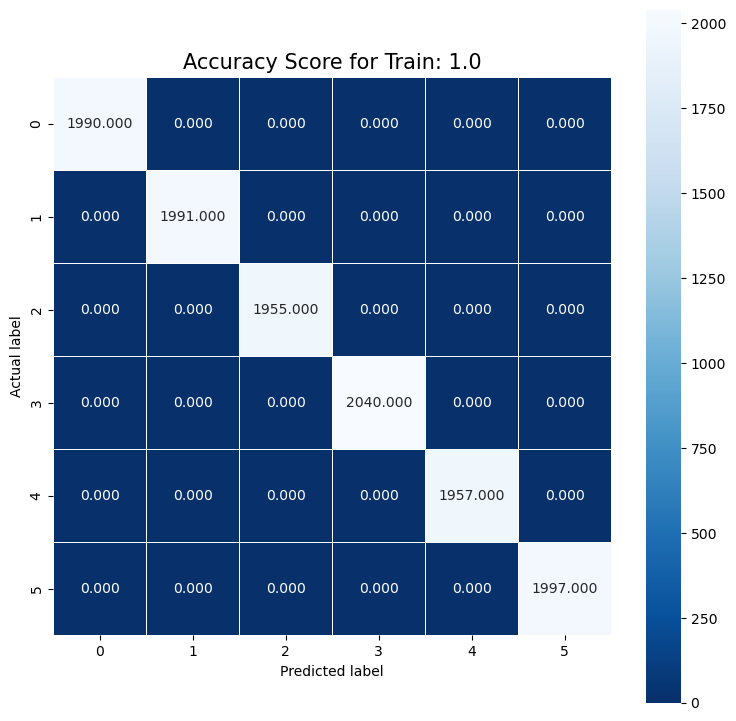

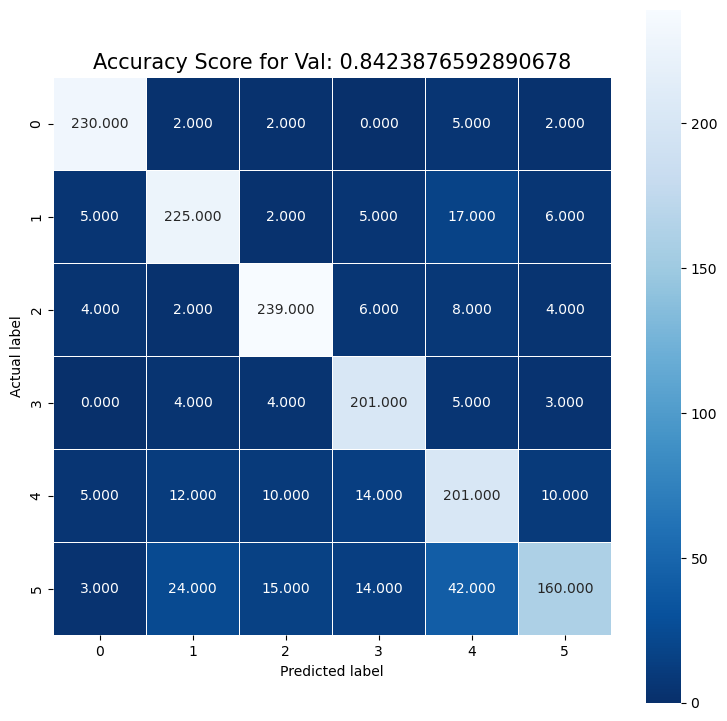

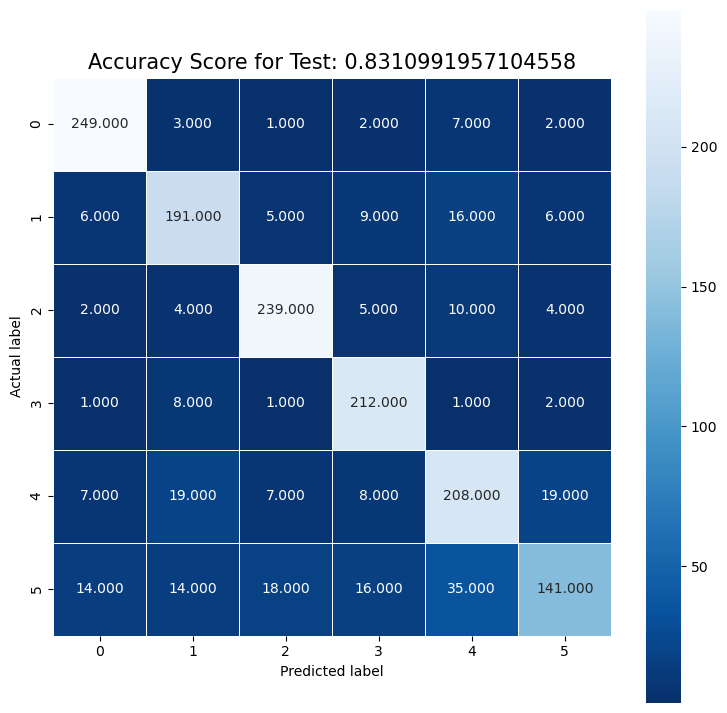

In [32]:
def confusion(predictions, actual, score, set):
    cm = skmetrics.confusion_matrix(actual, predictions)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = f'Accuracy Score for {set}: {score}'
    plt.title(all_sample_title, size = 15)

confusion(best_model.predict(x_train), y_train, best_model.score(x_train, y_train), "Train")
confusion(best_model.predict(x_val), y_val, best_model.score(x_val, y_val), "Val")
confusion(best_model.predict(x_test), y_test, best_model.score(x_test, y_test), "Test")